## Machine Learning Project - BIPxTech and Teamsystem

#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#### Reading dataset

In [3]:
#reading dataset from the xlsx file
df = pd.read_excel('luiss_data_anonym.xlsx')

In [4]:
#showing first 5 rows
df.head()

,Unnamed: 0,A,Ateco,B,C,DataDoc,D,E,F,G,...,Rev,CVia,Rifamm,X,Art2,Valore2,Art3,Valore3,TIva,Caus
0,1,7,476220,N,NaN,2022-08-09,I,NaN,NaN,NaN,...,NaN,N,NaN,N,NaN,NaN,NaN,NaN,12,12
1,2,7,476220,N,NaN,2022-08-09,I,NaN,NaN,NaN,...,NaN,N,NaN,N,NaN,NaN,NaN,NaN,12,12
2,3,7,476220,N,NaN,2022-08-09,I,NaN,NaN,NaN,...,NaN,N,NaN,N,NaN,NaN,NaN,NaN,12,12
3,4,7,476220,N,NaN,2022-08-09,I,NaN,NaN,NaN,...,NaN,N,NaN,N,NaN,NaN,NaN,NaN,12,12
4,5,7,476220,N,NaN,2022-08-09,I,NaN,NaN,NaN,...,NaN,N,NaN,N,NaN,NaN,NaN,NaN,12,12


#### Data Preprocessing and EDA

In [5]:
print("Shape of the dataframe:", df.shape)

Shape of the dataframe: (134437, 45)


Displaying dataframe by parts because it has big number of columns

In [6]:
df.iloc[:5, :15]

,Unnamed: 0,A,Ateco,B,C,DataDoc,D,E,F,G,H,Tdoc,VA,CE,DescrizioneRiga
0,1,7,476220,N,NaN,2022-08-09,I,NaN,NaN,NaN,NaN,TD04,A,NaN,MISSIONE INVALSI 5 MATEMATICA
1,2,7,476220,N,NaN,2022-08-09,I,NaN,NaN,NaN,NaN,TD04,A,NaN,VIAGGIO VACANZE 5
2,3,7,476220,N,NaN,2022-08-09,I,NaN,NaN,NaN,NaN,TD04,A,NaN,FINALMENTE IN SECONDARIA! 5
3,4,7,476220,N,NaN,2022-08-09,I,NaN,NaN,NaN,NaN,TD04,A,NaN,IN VACANZA CON PEPITO 3
4,5,7,476220,N,NaN,2022-08-09,I,NaN,NaN,NaN,NaN,TD04,A,NaN,TEORIA DELL'ISTITUZIONE E DELLA FONDAZIO


In [7]:
df.iloc[:5, 15:30]

,Importo,Iva,Conto,ContoStd,IvaM,Comp,Iva11,TM,%Forf,Art1,Valore1,Nomenclatura,Ritac,RF,%RIT1
0,3.22,N2.2,6625510,6625005,374.0,NaN,9.0,7,NaN,EAN,9788873343202,NaN,NaN,NaN,0.0
1,6.20,N2.2,6625510,6625005,374.0,NaN,9.0,7,NaN,EAN,9788842617013,NaN,NaN,NaN,0.0
2,21.06,N2.2,6625510,6625005,374.0,NaN,9.0,7,NaN,EAN,9788847238299,NaN,NaN,NaN,0.0
3,9.50,N2.2,6625510,6625005,374.0,NaN,9.0,7,NaN,EAN,9788876275432,NaN,NaN,NaN,0.0
4,11.38,N2.2,6625510,6625005,374.0,NaN,9.0,7,NaN,EAN,9788822903631,NaN,NaN,NaN,0.0


In [8]:
df.iloc[:5, 30:45]

,%RIT2,CoDitta,RifNormativo,CMar,CTra,Rev,CVia,Rifamm,X,Art2,Valore2,Art3,Valore3,TIva,Caus
0,0.0,533,N.I.art.74c.1-2,N,S,NaN,N,NaN,N,NaN,NaN,NaN,NaN,12,12
1,0.0,533,N.I.art.74c.1-2,N,S,NaN,N,NaN,N,NaN,NaN,NaN,NaN,12,12
2,0.0,533,N.I.art.74c.1-2,N,S,NaN,N,NaN,N,NaN,NaN,NaN,NaN,12,12
3,0.0,533,N.I.art.74c.1-2,N,S,NaN,N,NaN,N,NaN,NaN,NaN,NaN,12,12
4,0.0,533,N.I.art.74c.1-2,N,S,NaN,N,NaN,N,NaN,NaN,NaN,NaN,12,12


In [9]:
#showing some basic inital statistics of the dataframe
df.describe()

,Unnamed: 0,Ateco,C,DataDoc,Importo,Conto,ContoStd,IvaM,Comp,Iva11,TM,%Forf,Ritac,%RIT1,%RIT2,CoDitta,TIva,Caus
count,134437.000000,134437.000000,8757.000000,134437,1.344370e+05,1.344370e+05,1.344370e+05,133966.000000,0.0,33813.000000,134437.000000,35.000000,731.000000,134437.000000,134437.000000,134437.000000,134437.000000,134437.000000
mean,92883.393783,471724.595521,85.027863,2022-06-13 12:00:02.249380352,8.322071e+02,5.791699e+06,5.791546e+06,318.052707,NaN,11.015231,5.867834,65.428571,34.452804,0.261976,0.001217,1011.985718,5.605994,9.061092
min,1.000000,11110.000000,1.000000,2020-01-09 00:00:00,-4.597515e+05,6.001000e+04,6.001000e+04,2.000000,NaN,1.000000,3.000000,10.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,33640.000000,432101.000000,100.000000,2021-10-01 00:00:00,1.017000e+01,5.805125e+06,5.805125e+06,312.000000,NaN,9.000000,3.000000,60.000000,1.000000,0.000000,0.000000,59.000000,1.000000,1.000000
50%,67249.000000,471920.000000,100.000000,2022-08-31 00:00:00,3.800000e+01,5.810005e+06,5.810005e+06,324.000000,NaN,9.000000,7.000000,60.000000,3.000000,0.000000,0.000000,187.000000,1.000000,1.000000
75%,200892.000000,479110.000000,100.000000,2023-03-28 00:00:00,2.220000e+02,6.625015e+06,6.625005e+06,374.000000,NaN,9.000000,7.000000,60.000000,101.000000,0.000000,0.000000,621.000000,11.000000,11.000000
max,234501.000000,960909.000000,100.000000,2023-09-29 00:00:00,4.000000e+06,9.999009e+06,9.515090e+06,722.000000,NaN,35.000000,20.000000,100.000000,155.000000,100.000000,9.190000,9311.000000,74.000000,344.000000
std,77319.811350,185302.130522,31.185055,NaN,1.784612e+04,1.436308e+06,1.436286e+06,77.258443,NaN,6.460074,3.462215,19.605350,47.522008,2.299054,0.102382,2164.447142,5.065301,28.471706


In [10]:
#showing description of the dataframe columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134437 entries, 0 to 134436
Data columns (total 45 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Unnamed: 0       134437 non-null  int64         
 1   A                134437 non-null  object        
 2   Ateco            134437 non-null  int64         
 3   B                134383 non-null  object        
 4   C                8757 non-null    float64       
 5   DataDoc          134437 non-null  datetime64[ns]
 6   D                134436 non-null  object        
 7   E                1795 non-null    object        
 8   F                1795 non-null    object        
 9   G                19 non-null      object        
 10  H                19 non-null      object        
 11  Tdoc             134437 non-null  object        
 12  VA               134437 non-null  object        
 13  CE               2091 non-null    object        
 14  DescrizioneRiga  133

In [11]:
#showing null values count for each column in dataframe
df.isna().sum()

Unnamed: 0              0
A                       0
Ateco                   0
B                      54
C                  125680
DataDoc                 0
D                       1
E                  132642
F                  132642
G                  134418
H                  134418
Tdoc                    0
VA                      0
CE                 132346
DescrizioneRiga       905
Importo                 0
Iva                     0
Conto                   0
ContoStd                0
IvaM                  471
Comp               134437
Iva11              100624
TM                      0
%Forf              134402
Art1                   48
Valore1                75
Nomenclatura       134416
Ritac              133706
RF                  79149
%RIT1                   0
%RIT2                   0
CoDitta                 0
RifNormativo        71485
CMar                  403
CTra                   84
Rev                  1657
CVia                    0
Rifamm             132846
X           

<AxesSubplot: >

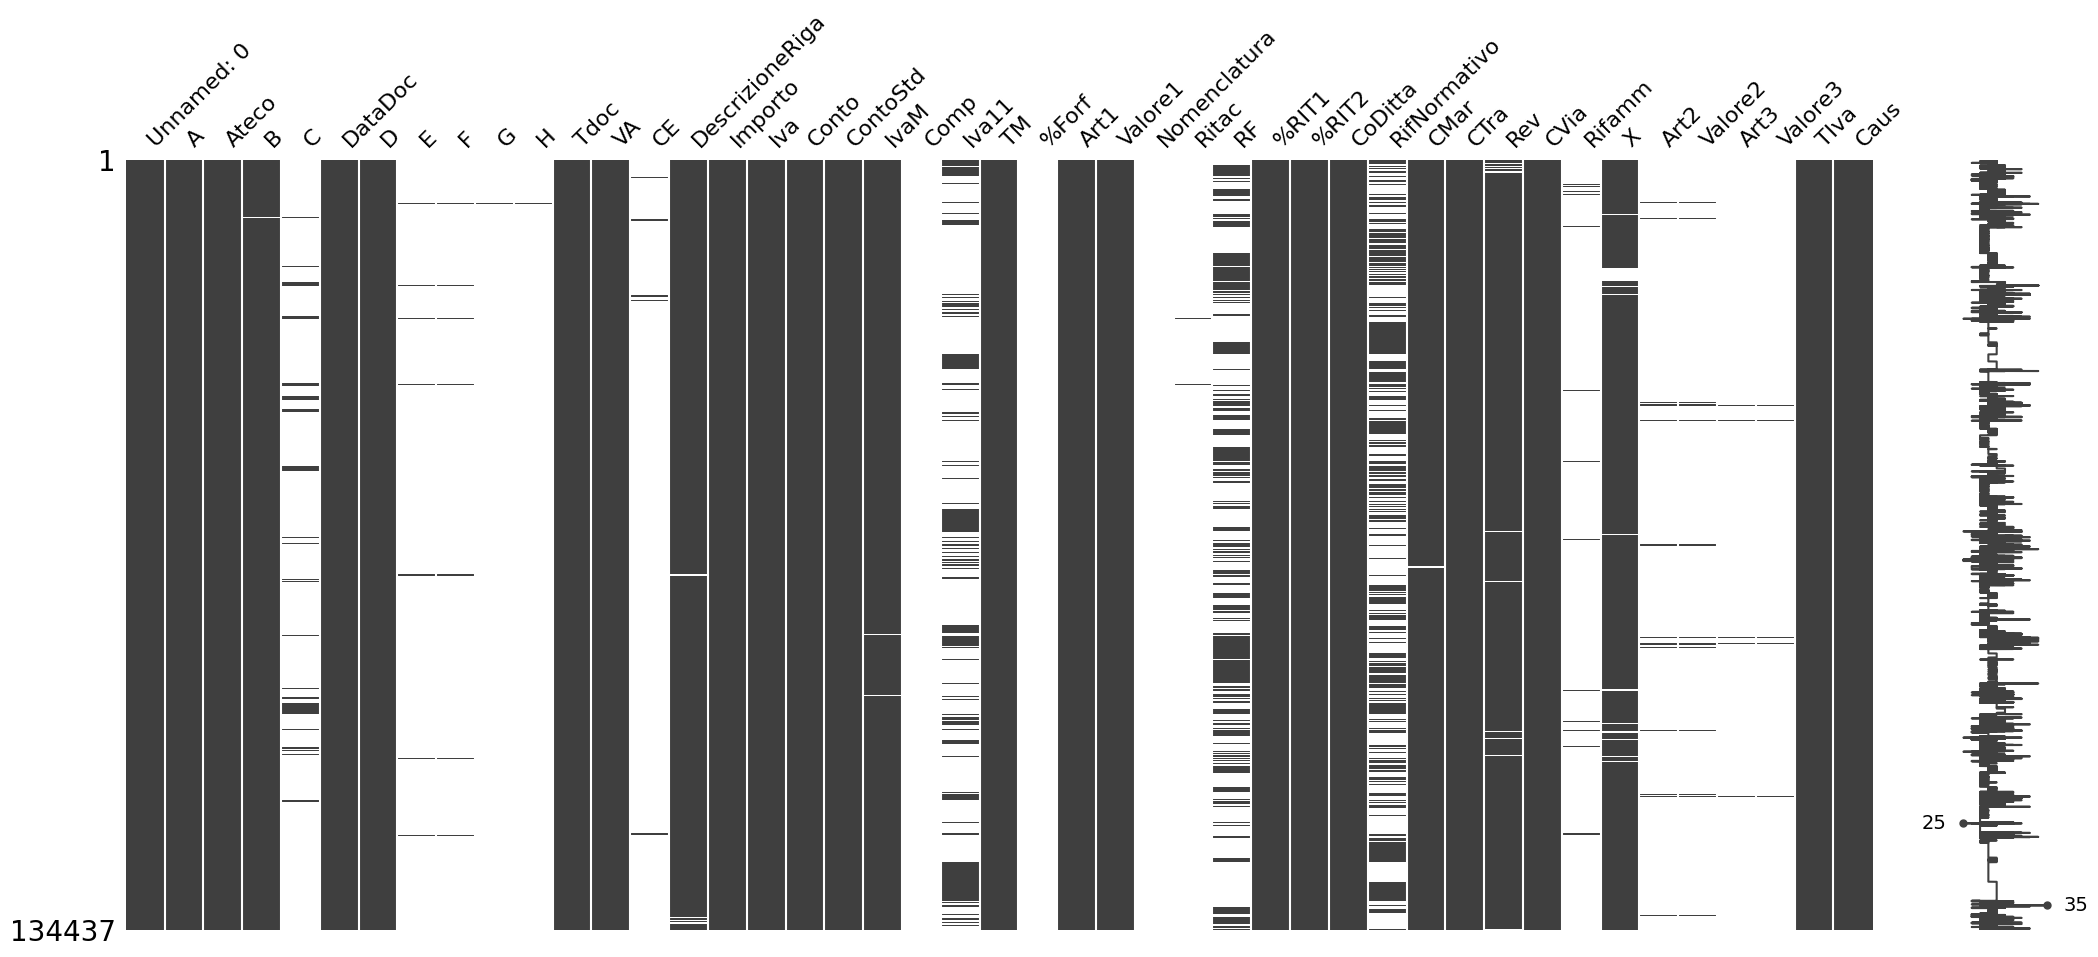

In [12]:
#showing null values visually with missingno library
%matplotlib inline
msno.matrix(df)

In [13]:
#dropping columns with more than 50% missing values 
df.drop(columns=['Unnamed: 0', 'C', 'E', 'F', 'G', 'H', 'CE', 'Comp', 'Iva11', '%Forf', 
                 'Nomenclatura', 'Ritac', 'RF', 'RifNormativo', 
                 'Rifamm', 'Art2', 'Valore2', 'Art3', 'Valore3'], inplace=True)

In [14]:
df

,A,Ateco,B,DataDoc,D,Tdoc,VA,DescrizioneRiga,Importo,Iva,...,%RIT1,%RIT2,CoDitta,CMar,CTra,Rev,CVia,X,TIva,Caus
0,7,476220,N,2022-08-09,I,TD04,A,MISSIONE INVALSI 5 MATEMATICA,3.22,N2.2,...,0.0,0.0,533,N,S,NaN,N,N,12,12
1,7,476220,N,2022-08-09,I,TD04,A,VIAGGIO VACANZE 5,6.20,N2.2,...,0.0,0.0,533,N,S,NaN,N,N,12,12
2,7,476220,N,2022-08-09,I,TD04,A,FINALMENTE IN SECONDARIA! 5,21.06,N2.2,...,0.0,0.0,533,N,S,NaN,N,N,12,12
3,7,476220,N,2022-08-09,I,TD04,A,IN VACANZA CON PEPITO 3,9.50,N2.2,...,0.0,0.0,533,N,S,NaN,N,N,12,12
4,7,476220,N,2022-08-09,I,TD04,A,TEORIA DELL'ISTITUZIONE E DELLA FONDAZIO,11.38,N2.2,...,0.0,0.0,533,N,S,NaN,N,N,12,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134432,7,563000,N,2023-06-12,I,TD01,A,ACCREDITO CAUZIONI,-10.00,N1,...,0.0,0.0,62,N,N,N,N,B,11,11
134433,7,563000,N,2023-06-09,I,TD01,A,ADDEBITO CAUZIONI,120.00,N1,...,0.0,0.0,62,N,N,N,N,B,11,11
134434,7,563000,N,2023-06-09,I,TD01,A,ACCREDITO CAUZIONI,-150.00,N1,...,0.0,0.0,62,N,N,N,N,B,11,11
134435,7,563000,N,2023-06-06,I,TD01,A,ADDEBITO CAUZIONI,52.00,N1,...,0.0,0.0,62,N,N,N,N,B,11,11


In [15]:
#showing null values count again
df.isna().sum()

A                     0
Ateco                 0
B                    54
DataDoc               0
D                     1
Tdoc                  0
VA                    0
DescrizioneRiga     905
Importo               0
Iva                   0
Conto                 0
ContoStd              0
IvaM                471
TM                    0
Art1                 48
Valore1              75
%RIT1                 0
%RIT2                 0
CoDitta               0
CMar                403
CTra                 84
Rev                1657
CVia                  0
X                  4465
TIva                  0
Caus                  0
dtype: int64

<AxesSubplot: >

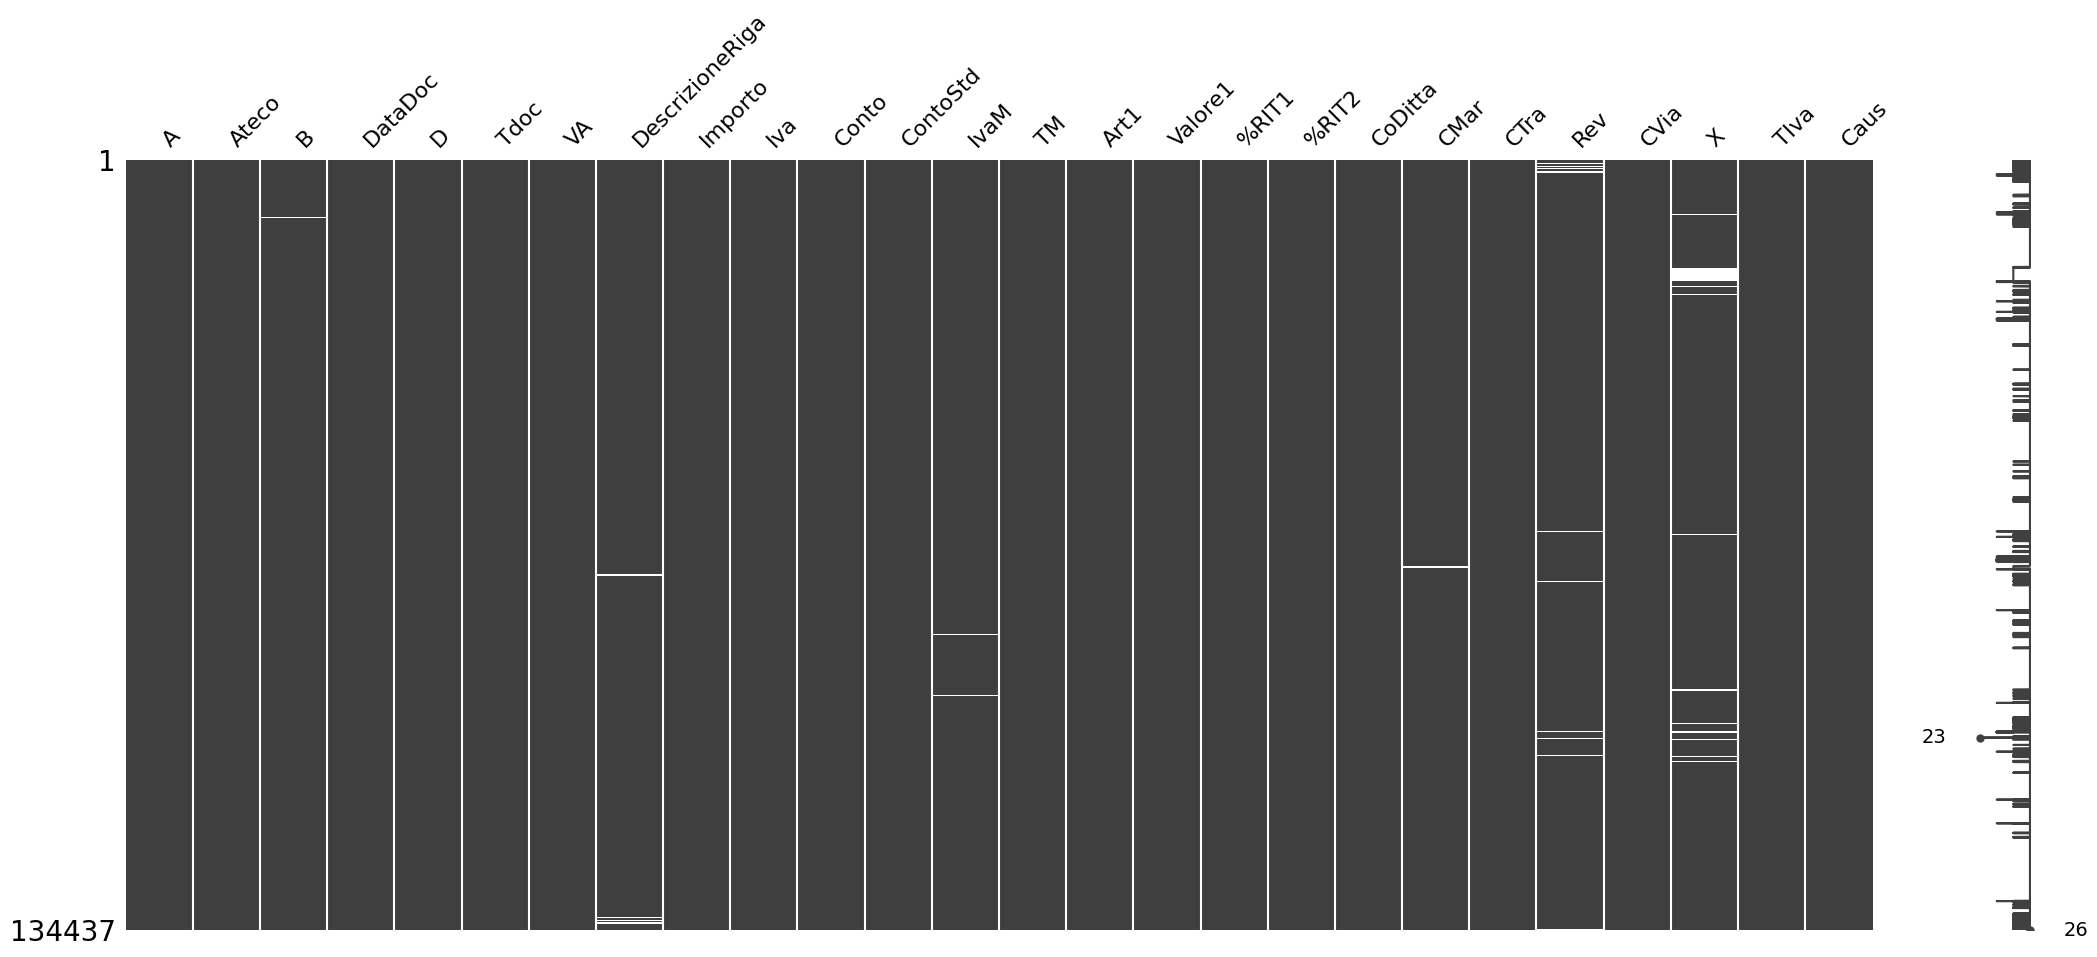

In [16]:
#checking the null values visually again
msno.matrix(df)

In [17]:
#number of unique for each column in dataframe
unique_counts = df.nunique()
print(unique_counts)

A                     13
Ateco                387
B                      5
DataDoc             1082
D                      3
Tdoc                  11
VA                     2
DescrizioneRiga    62567
Importo            22548
Iva                   24
Conto                707
ContoStd             365
IvaM                  60
TM                    12
Art1                 482
Valore1            44038
%RIT1                  8
%RIT2                  3
CoDitta              727
CMar                   4
CTra                   2
Rev                    2
CVia                   2
X                      3
TIva                  12
Caus                  38
dtype: int64


In [18]:
#shwoing unique values of X column
df['X'].unique()

array(['N', 'S', 'B', nan], dtype=object)

In [19]:
#shwoing unique values of D column
df['D'].unique()

array(['I', 'D', 'S', nan], dtype=object)

In [20]:
#shwoing unique values of B column
df['B'].unique()

array(['N', 'S', nan, 'C', 'X', 0], dtype=object)

In [21]:
#shwoing unique values of Iva column
df['Iva'].unique()

array(['N2.2', 'N1', 'N6.7', 'N3.4', 'N3.1', 'N3.2', 'N3.6', 'N4', 'N6.3',
       'N3.5', 'N6.1', 'N6.9', 'N6.6', 'N2', 'N2.1', 'N6.2', 'N5', 'N6',
       'N3', 'N6.8', 'N6.4', 'N3.3', 'N6.5', 'N7'], dtype=object)

In [22]:
#shwoing unique values of IvaM column
df['IvaM'].unique()

array([374., 315., 302.,  22., 314., 323., 354., 307., 326., 346., 310.,
       300., 324., 341., 375., 381.,  nan, 327., 312., 306., 325., 347.,
       308., 339., 309., 301., 318., 377., 372., 336.,  10.,   2., 622.,
       376.,  35., 371., 321., 369., 304., 317., 340., 322., 350., 345.,
        23., 316., 222., 399., 370., 311., 379., 110., 329., 303., 722.,
       367., 358., 334., 355., 331., 356.])

Investigating data of mismatched IvaM code given from the description by company

In [23]:
df[df['IvaM'] == 2]

,A,Ateco,B,DataDoc,D,Tdoc,VA,DescrizioneRiga,Importo,Iva,...,%RIT1,%RIT2,CoDitta,CMar,CTra,Rev,CVia,X,TIva,Caus
9426,7,329990,N,2023-02-28,I,TD24,A,ADDEBITO IMBALLAGGI -,90.0,N6.1,...,0.0,0.0,175,N,N,S,N,N,11,236
9427,7,329990,N,2023-01-31,I,TD24,A,ADDEBITO IMBALLAGGI -,210.0,N6.1,...,0.0,0.0,175,N,N,S,N,N,11,236
9428,7,329990,N,2023-01-31,I,TD24,A,ADDEBITO IMBALLAGGI -,75.0,N6.1,...,0.0,0.0,175,N,N,S,N,N,11,236
9430,7,329990,N,2023-03-31,I,TD24,A,ADDEBITO IMBALLAGGI -,6030.0,N6.1,...,0.0,0.0,175,N,N,S,N,N,11,236
9431,7,329990,N,2023-03-31,I,TD24,A,ADDEBITO IMBALLAGGI -,525.0,N6.1,...,0.0,0.0,175,N,N,S,N,N,11,236
9439,7,329990,N,2023-04-28,I,TD24,A,ADDEBITO IMBALLAGGI -,2100.0,N6.1,...,0.0,0.0,175,N,N,S,N,N,11,236
9440,7,329990,N,2023-04-28,I,TD24,A,ADDEBITO IMBALLAGGI -,2610.0,N6.1,...,0.0,0.0,175,N,N,S,N,N,11,236
9441,7,329990,N,2023-04-28,I,TD24,A,ADDEBITO IMBALLAGGI -,810.0,N6.1,...,0.0,0.0,175,N,N,S,N,N,11,236


In [24]:
df[df['IvaM'] == 10]

,A,Ateco,B,DataDoc,D,Tdoc,VA,DescrizioneRiga,Importo,Iva,...,%RIT1,%RIT2,CoDitta,CMar,CTra,Rev,CVia,X,TIva,Caus
9250,7,412000,N,2023-03-17,I,TD01,A,Vs dare per prestazione di manodopera per lavo...,4500.0,N6.3,...,0.0,0.0,274,N,S,S,N,N,11,11
9254,7,412000,N,2021-01-27,I,TD01,A,Acconto per lavori edili presso il cantiere in...,3500.0,N6.3,...,0.0,0.0,512,N,S,S,N,N,11,11
9255,7,412000,N,2021-03-05,I,TD01,A,RICEVO COME SALDO PER VOSTRO DARE PER LAVORI E...,900.0,N6.3,...,0.0,0.0,512,N,S,S,N,N,11,11
9256,7,412000,N,2021-02-20,I,TD01,A,Vostro dare per lavori svolti presso Vostri ca...,850.0,N6.3,...,0.0,0.0,512,N,S,S,N,N,11,11
9257,7,412000,N,2021-02-15,I,TD01,A,Acconto per lavori edili presso il cantiere in...,3000.0,N6.3,...,0.0,0.0,512,N,S,S,N,N,11,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131574,6,412000,N,2023-03-13,I,TD01,A,Primo stato di avanzamento - Lavori per vostro...,18000.0,N6.7,...,0.0,0.0,3173,N,N,S,N,N,11,11
131575,6,412000,N,2023-04-28,I,TD01,A,Lavori eseguiti presso cantiere Via Bornata - ...,175.0,N6.7,...,0.0,0.0,3173,N,N,S,N,N,11,236
131576,6,412000,N,2023-04-28,I,TD01,A,Lavori eseguiti presso cantiere Poncarale - ri...,1545.0,N6.7,...,0.0,0.0,3173,N,N,S,N,N,11,236
131577,6,412000,N,2023-05-12,I,TD01,A,Secondo e ultimo stato di avanzamento - Lavori...,3830.0,N6.7,...,0.0,0.0,3173,N,N,S,N,N,11,11


In [25]:
df[df['IvaM'] == 22]

,A,Ateco,B,DataDoc,D,Tdoc,VA,DescrizioneRiga,Importo,Iva,...,%RIT1,%RIT2,CoDitta,CMar,CTra,Rev,CVia,X,TIva,Caus
2243,7,133000,N,2022-05-31,I,TD01,A,CONTROLLO PER.PORTA 1 BATTENTE,8.00,N6.7,...,0.0,0.0,541,N,S,S,N,N,11,11
2244,7,133000,N,2022-05-31,I,TD01,A,CONTROLLO PER.USC.SICUREZZA 1A,24.00,N6.7,...,0.0,0.0,541,N,S,S,N,N,11,11
2251,7,133000,N,2022-11-30,I,TD01,A,CONTROLLO PER.PORTA 1 BATTENTE,8.00,N6.7,...,0.0,0.0,541,N,S,S,N,N,11,11
2252,7,133000,N,2022-11-30,I,TD01,A,CONTROLLO PER.USC.SICUREZZA 1A,24.00,N6.7,...,0.0,0.0,541,N,S,S,N,N,11,11
2259,7,133000,N,2023-05-31,I,TD01,A,CONTROLLO PER.PORTA 1 BATTENTE,8.92,N6.7,...,0.0,0.0,541,N,S,S,N,N,11,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134080,7,439909,N,2021-11-30,I,TD24,A,BANCALE VAGA RESO - rev. charge escl. art. 74 ...,-14.00,N6.1,...,0.0,0.0,39,N,N,S,N,N,11,11
134081,7,439909,N,2023-02-28,I,TD24,A,BANCALE VAGA,16.00,N6.1,...,0.0,0.0,39,N,N,S,N,N,11,11
134169,7,501000,N,2021-11-26,I,TD01,A,MD SMARTPAD AZIMUT PRO 11.6 4/64,189.00,N6.6,...,0.0,0.0,206,N,N,S,N,N,11,11
134171,7,501000,N,2022-02-15,I,TD01,A,MEDIACOM SMARTPAD AZIMUT3 4/64,159.90,N6.6,...,0.0,0.0,206,N,N,S,N,N,11,11


In [26]:
df[df['IvaM'] == 23]

,A,Ateco,B,DataDoc,D,Tdoc,VA,DescrizioneRiga,Importo,Iva,...,%RIT1,%RIT2,CoDitta,CMar,CTra,Rev,CVia,X,TIva,Caus
43090,7,433901,N,2023-05-22,I,TD01,A,FATTURA PER LAVOTRI EFFETTUATI PRESSO CANTIERE...,3500.0,N6.3,...,0.0,0.0,488,N,N,S,N,N,11,11


In [27]:
df[df['IvaM'] == 35]

,A,Ateco,B,DataDoc,D,Tdoc,VA,DescrizioneRiga,Importo,Iva,...,%RIT1,%RIT2,CoDitta,CMar,CTra,Rev,CVia,X,TIva,Caus
23739,7,471120,N,2021-02-02,I,TD01,A,Interventi di manutenzione straordinaria impia...,465.0,N6.7,...,0.0,0.0,957,N,N,S,N,N,11,11
66507,7,412000,N,2023-06-13,I,TD01,A,2 acconto lavori di manutenzione straordinaria...,10000.0,N6.7,...,0.0,0.0,143,N,N,S,N,N,11,11
66508,7,412000,N,2023-05-31,I,TD01,A,"Servizi di pulizia presso il Vs. ufficio, di V...",630.0,N6.7,...,0.0,0.0,143,N,N,S,N,N,11,11
77585,7,433901,N,2021-06-30,I,TD01,A,LAVORI DI SVELLIMENTO DEL PIAZZALE ESISTENTE,350.0,N6.3,...,0.0,0.0,1021,N,N,S,N,N,11,227
99180,7,551000,N,2023-04-19,I,TD01,A,INTERVENTO PER DIAGNOSI GUASTO COME DA NS. RAP...,190.0,N6.7,...,0.0,0.0,1,N,N,S,N,N,11,11


In [28]:
df[df['IvaM'] == 110]

,A,Ateco,B,DataDoc,D,Tdoc,VA,DescrizioneRiga,Importo,Iva,...,%RIT1,%RIT2,CoDitta,CMar,CTra,Rev,CVia,X,TIva,Caus
91536,7,433909,N,2021-04-27,I,TD01,A,I ACCONTO PER I LAVORI REALIZZAZIONE DI IMPI...,3500.0,N6.3,...,0.0,0.0,250,N,N,S,N,N,11,11


In [29]:
df[df['IvaM'] == 622]

,A,Ateco,B,DataDoc,D,Tdoc,VA,DescrizioneRiga,Importo,Iva,...,%RIT1,%RIT2,CoDitta,CMar,CTra,Rev,CVia,X,TIva,Caus
9447,S,931910,N,2022-11-30,I,TD04,A,NR NOTA DI CREDITO rif. nostrE Fatt. n: 1/11/4...,3000.00,N6.7,...,0.0,0.0,177,N,N,S,N,NaN,12,336
38981,7,823000,N,2021-03-04,I,TD01,A,APPLE WATCH S6 40 GLD AL PS SP CEL-ISP,441.80,N6.9,...,0.0,0.0,1,N,N,S,N,S,19,19
38982,7,823000,N,2021-03-04,I,TD01,A,APPLE WATCH 40 GOLD MIL LP-ZML,81.15,N6.9,...,0.0,0.0,1,N,N,S,N,S,19,19
44064,7,162919,N,2022-03-15,I,TD02,V,SOLO FORNITURA di UN casellario postale da nÃ‚...,920.00,N6.9,...,0.0,0.0,4,N,S,N,N,N,1,1
44424,7,682001,N,2021-09-30,I,TD01,A,Contratto di appalto di pulizia. Servizi strao...,836.00,N6.7,...,0.0,0.0,164,N,N,S,N,N,11,236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44547,7,682001,N,2023-06-30,I,TD01,A,Contratto di appalto di pulizia del 01/10/2022...,2150.00,N6.7,...,0.0,0.0,164,N,N,S,N,N,11,236
44548,7,682001,N,2023-06-30,I,TD01,A,Contratto di appalto di pulizia del 01/10/2022...,1020.00,N6.7,...,0.0,0.0,164,N,N,S,N,N,11,236
44549,7,682001,N,2023-06-30,I,TD01,A,Contratto di appalto di pulizia. Servizi strao...,626.00,N6.7,...,0.0,0.0,164,N,N,S,N,N,11,236
44550,7,682001,N,2023-07-31,I,TD01,A,Contratto di appalto di pulizia del 01/10/2022...,2150.00,N6.7,...,0.0,0.0,164,N,N,S,N,N,11,236


In [30]:
df[df['IvaM'] == 722]

,A,Ateco,B,DataDoc,D,Tdoc,VA,DescrizioneRiga,Importo,Iva,...,%RIT1,%RIT2,CoDitta,CMar,CTra,Rev,CVia,X,TIva,Caus
102538,1,862209,N,2021-04-24,I,TD01,A,Stuccature e tinteggiatura // Tinteggiatura di...,290.00,N6.7,...,0.0,0.0,92,N,N,S,N,S,11,11
115907,1,692011,N,2021-12-09,I,TD01,A,APPLE WATCH S7 45 MID AL MID SP GPS-ISP,384.43,N6.9,...,0.0,0.0,7,N,N,S,N,N,11,11
115908,1,692011,N,2022-09-29,I,TD01,A,USB-C TO USB ADAPTER-ZML,20.49,N6.9,...,0.0,0.0,7,N,N,S,N,N,11,11


In [31]:
df_ivam = df[df['IvaM'].isin([2, 10, 22, 23, 35, 110, 306, 318, 325, 331, 339, 355, 356, 622, 722])]

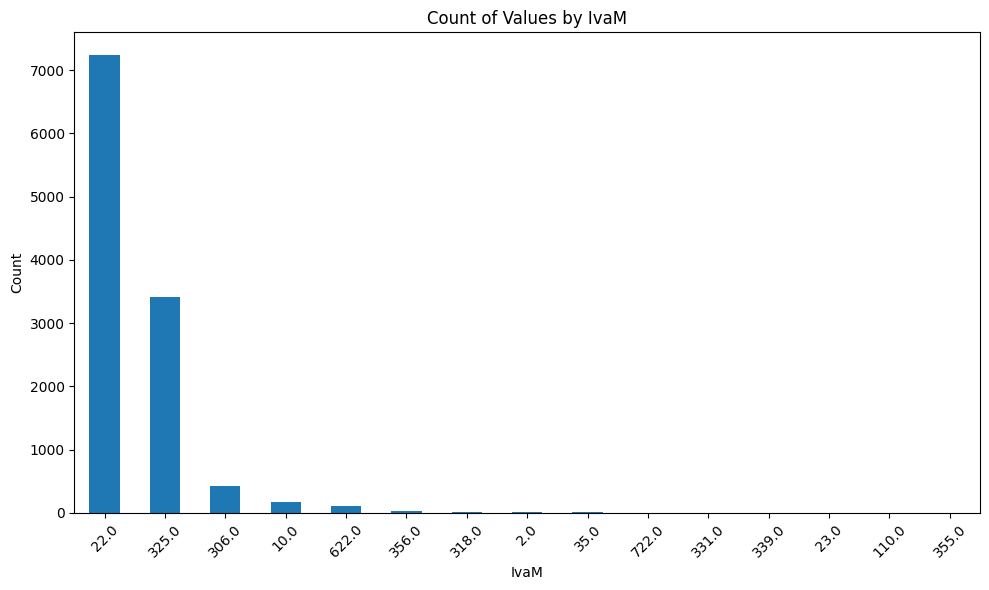

In [32]:
value_counts = df_ivam['IvaM'].value_counts()

#plotting the counts of mismatched IvaM codes
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar')
plt.title('Count of Values by IvaM')
plt.xlabel('IvaM')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [33]:
#showing rows of dataframe where importo has negative value
df[df['Importo'] <= 0]

,A,Ateco,B,DataDoc,D,Tdoc,VA,DescrizioneRiga,Importo,Iva,...,%RIT1,%RIT2,CoDitta,CMar,CTra,Rev,CVia,X,TIva,Caus
2242,7,133000,N,2022-01-17,I,TD24,A,STORNO CAPARRA CONFIRMATORIA RIF. FATTURA N. 2...,-66500.0,N1,...,0.0,0.0,541,N,N,N,N,N,11,11
2824,7,107110,N,2022-02-17,I,TD01,A,Indennizzo ritardata fatturazione di per*odo,-6.0,N3.5,...,0.0,0.0,20,N,N,N,N,N,11,11
2827,7,107110,N,2022-10-27,I,TD01,A,Indennizzo ritardata fatturazione di per*odo,-6.0,N1,...,0.0,0.0,20,N,N,N,N,N,11,11
2888,7,475110,N,2021-06-21,I,TD24,A,Omaggio,-10.0,N2.2,...,0.0,0.0,460,N,N,N,N,N,11,11
2889,7,475110,N,2022-03-28,I,TD24,A,Omaggio,-10.0,N2.2,...,0.0,0.0,460,N,N,N,N,N,11,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134428,7,563000,N,2023-06-20,I,TD01,A,ACCREDITO CAUZIONI,-42.0,N1,...,0.0,0.0,62,N,N,N,N,B,11,11
134430,7,563000,N,2023-06-16,I,TD01,A,ACCREDITO CAUZIONI,-110.0,N1,...,0.0,0.0,62,N,N,N,N,B,11,11
134432,7,563000,N,2023-06-12,I,TD01,A,ACCREDITO CAUZIONI,-10.0,N1,...,0.0,0.0,62,N,N,N,N,B,11,11
134434,7,563000,N,2023-06-09,I,TD01,A,ACCREDITO CAUZIONI,-150.0,N1,...,0.0,0.0,62,N,N,N,N,B,11,11


In [34]:
#making a copy of datadframe for the future
df_copy = df.copy()

#### Pre-processing for the first approach

In [35]:
#dropping X column 
df_1 = df.drop(columns = ['X'])

In [36]:
#dropping all null values 
df_1 = df_1.dropna()

In [37]:
#changing data type of IvaM to int
df_1['IvaM'] = df_1['IvaM'].astype('int32')

In [38]:
#checking for the null values
df_1.isnull().sum()

A                  0
Ateco              0
B                  0
DataDoc            0
D                  0
Tdoc               0
VA                 0
DescrizioneRiga    0
Importo            0
Iva                0
Conto              0
ContoStd           0
IvaM               0
TM                 0
Art1               0
Valore1            0
%RIT1              0
%RIT2              0
CoDitta            0
CMar               0
CTra               0
Rev                0
CVia               0
TIva               0
Caus               0
dtype: int64

In [39]:
df_1

,A,Ateco,B,DataDoc,D,Tdoc,VA,DescrizioneRiga,Importo,Iva,...,Valore1,%RIT1,%RIT2,CoDitta,CMar,CTra,Rev,CVia,TIva,Caus
12,7,476220,N,2022-08-08,I,TD01,A,GET THINKING. STUDENT'S BOOK AND WORKBOO,25.35,N2.2,...,9781108874960,0.0,0.0,533,N,N,N,N,11,11
13,7,476220,N,2022-08-08,I,TD01,A,SUCCEDE SEMPRE QUALCOSA DI MERAVIGLIOSO,13.51,N2.2,...,9788804729044,0.0,0.0,533,N,N,N,N,11,11
14,7,476220,N,2022-08-08,I,TD01,A,MATEMATICA.ROSSO PER LE SCUOLE SUPERIOR,29.09,N2.2,...,9788808339348,0.0,0.0,533,N,N,N,N,11,11
15,7,476220,N,2022-08-08,I,TD01,A,IT ENDS WITH US,11.31,N2.2,...,9788820072940,0.0,0.0,533,N,N,N,N,11,11
16,7,476220,N,2022-08-08,I,TD01,A,PIETRE PARLANO 2 CORSO DI STORIA,46.72,N2.2,...,9788858312711,0.0,0.0,533,N,N,N,N,11,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134432,7,563000,N,2023-06-12,I,TD01,A,ACCREDITO CAUZIONI,-10.00,N1,...,VCL-ACCREDITO,0.0,0.0,62,N,N,N,N,11,11
134433,7,563000,N,2023-06-09,I,TD01,A,ADDEBITO CAUZIONI,120.00,N1,...,VCL-ADDEBITO,0.0,0.0,62,N,N,N,N,11,11
134434,7,563000,N,2023-06-09,I,TD01,A,ACCREDITO CAUZIONI,-150.00,N1,...,VCL-ACCREDITO,0.0,0.0,62,N,N,N,N,11,11
134435,7,563000,N,2023-06-06,I,TD01,A,ADDEBITO CAUZIONI,52.00,N1,...,VCL-ADDEBITO,0.0,0.0,62,N,N,N,N,11,11


In [40]:
#we are dropping this columns because they are have a lot of categories
df_1 = df_1.drop(columns = ['DataDoc', 'DescrizioneRiga', 'Art1', 'Valore1'])

In [41]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130824 entries, 12 to 134436
Data columns (total 21 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   A         130824 non-null  object 
 1   Ateco     130824 non-null  int64  
 2   B         130824 non-null  object 
 3   D         130824 non-null  object 
 4   Tdoc      130824 non-null  object 
 5   VA        130824 non-null  object 
 6   Importo   130824 non-null  float64
 7   Iva       130824 non-null  object 
 8   Conto     130824 non-null  int64  
 9   ContoStd  130824 non-null  int64  
 10  IvaM      130824 non-null  int32  
 11  TM        130824 non-null  int64  
 12  %RIT1     130824 non-null  float64
 13  %RIT2     130824 non-null  float64
 14  CoDitta   130824 non-null  int64  
 15  CMar      130824 non-null  object 
 16  CTra      130824 non-null  object 
 17  Rev       130824 non-null  object 
 18  CVia      130824 non-null  object 
 19  TIva      130824 non-null  int64  
 20  Caus    

In [42]:
#dictionary of encoders
encoders = {}

#storing encoders and encoding the dataset
for column in df_1.columns:
    if column != 'Importo':
        df_1[column] = df_1[column].astype(str)
        le = LabelEncoder()
        df_1[column] = le.fit_transform(df_1[column])
        encoders[column] = le

In [43]:
df_1

,A,Ateco,B,D,Tdoc,VA,Importo,Iva,Conto,ContoStd,...,TM,%RIT1,%RIT2,CoDitta,CMar,CTra,Rev,CVia,TIva,Caus
12,6,206,2,1,0,0,25.35,3,337,167,...,8,0,0,537,3,0,0,0,1,1
13,6,206,2,1,0,0,13.51,3,337,167,...,8,0,0,537,3,0,0,0,1,1
14,6,206,2,1,0,0,29.09,3,337,167,...,8,0,0,537,3,0,0,0,1,1
15,6,206,2,1,0,0,11.31,3,337,167,...,8,0,0,537,3,0,0,0,1,1
16,6,206,2,1,0,0,46.72,3,337,167,...,8,0,0,537,3,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134432,6,252,2,1,0,0,-10.00,0,20,17,...,10,0,0,584,3,0,0,0,1,1
134433,6,252,2,1,0,0,120.00,0,20,17,...,10,0,0,584,3,0,0,0,1,1
134434,6,252,2,1,0,0,-150.00,0,20,17,...,10,0,0,584,3,0,0,0,1,1
134435,6,252,2,1,0,0,52.00,0,20,17,...,10,0,0,584,3,0,0,0,1,1


In [44]:
#correlation matrix of obtained dataframe for the first approach
corr_matrix_df1 = df_1.corr()

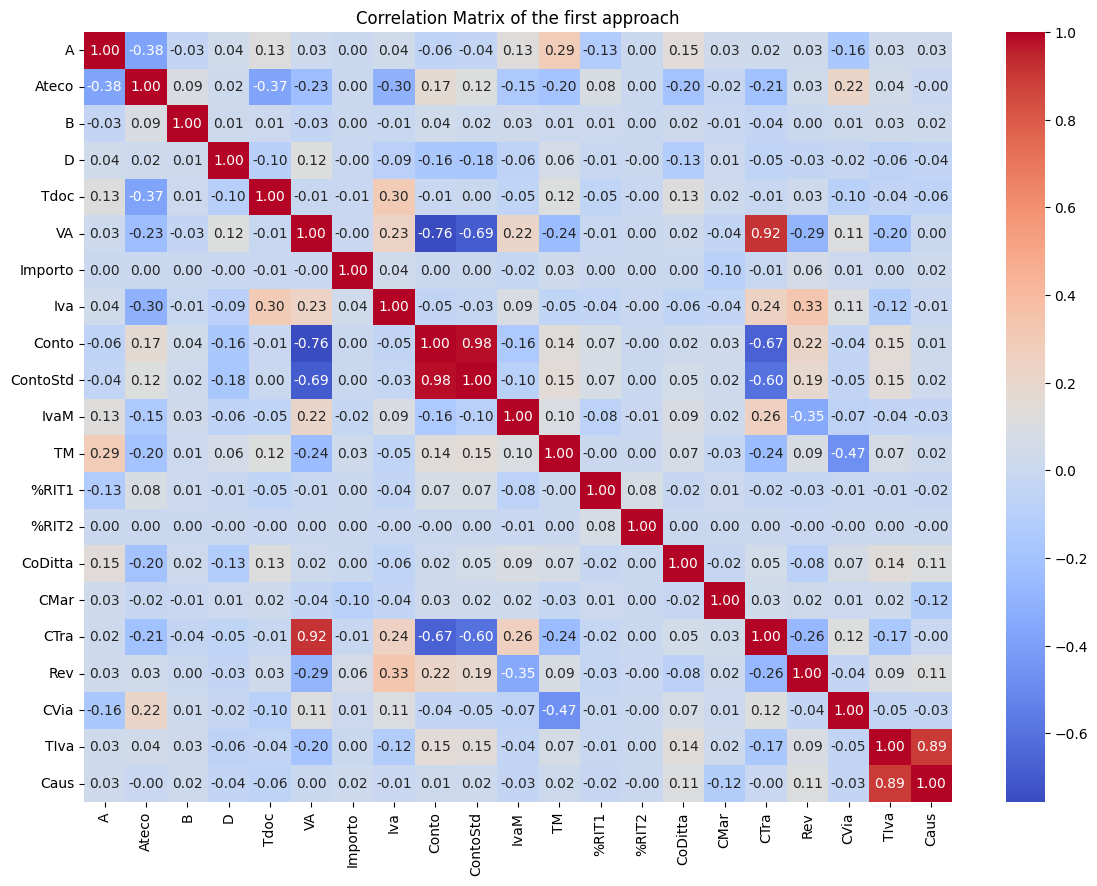

In [45]:
#plotting the correlation matrix 
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix_df1, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of the first approach')
plt.show()

#### ML Approach 1

In [117]:
#dividing features and target vaiable (IvaM)
X = df_1.drop(columns=["IvaM"]) 
y = df_1["IvaM"]  

In [118]:
#splitting train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
#defining a multinomial logistic regression model and fitting in train dataset
model_lg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model_lg.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

In [49]:
#predicting variables on test dataset
y_pred_lg = model_lg.predict(X_test)

In [50]:
#printing evaluation metric results for the logistic regression model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lg))
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_lg))

Logistic Regression Accuracy: 0.32906554557615136
Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           2       0.00      0.00      0.00         2
           3       0.23      0.29      0.26      1401
           4       0.00      0.00      0.00         1
           6       0.48      0.03      0.06       646
           7       0.00      0.00      0.00        16
           8       0.00      0.00      0.00      1240
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00        33
          11       0.00      0.00      0.00        80
          12       0.00      0.00      0.00       113
          13       0.00      0.00      0.00       532
          14       0.00      0.00      0.00        34
          15       0.16      0.06      0.09      1224
          16       0.00      0.00      0.00         1
          17       0.54      0.28      0.37      2265
  

In [51]:
#defining simple SupportVectorMachine classifier model and fitting in train dataset
model_svc = SVC()
model_svc.fit(X_train, y_train)

SVC()

In [52]:
#predicting variables on test dataset
y_pred_svc = model_svc.predict(X_test)

In [53]:
#printing evaluation metric results for the svm model
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svc))
print("SVM Report:\n", classification_report(y_test, y_pred_svc))

SVM Accuracy: 0.3917446971144659
SVM Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           2       0.00      0.00      0.00         2
           3       0.48      0.24      0.32      1401
           4       0.00      0.00      0.00         1
           6       0.51      0.03      0.06       646
           7       0.00      0.00      0.00        16
           8       0.76      0.79      0.78      1240
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00        33
          11       0.00      0.00      0.00        80
          12       0.00      0.00      0.00       113
          13       0.00      0.00      0.00       532
          14       0.00      0.00      0.00        34
          15       0.44      0.09      0.15      1224
          16       0.00      0.00      0.00         1
          17       0.36      0.30      0.33      2265
          18       0.00      0.00  

In [54]:
#defining KNeighborsClassifier and fitting in train dataset
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [55]:
#predicting variables on test dataset
y_pred_knn = model_knn.predict(X_test)

In [56]:
#printing evaluation metric results for the knn model
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN Report:\n", classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.9044907318937512
KNN Report:
               precision    recall  f1-score   support

           0       0.25      0.21      0.23        29
           2       0.00      0.00      0.00         2
           3       0.78      0.84      0.81      1401
           4       0.00      0.00      0.00         1
           6       0.73      0.68      0.70       646
           7       0.57      0.25      0.35        16
           8       0.92      0.93      0.93      1240
           9       0.00      0.00      0.00         2
          10       0.70      0.91      0.79        33
          11       0.57      0.57      0.57        80
          12       0.83      0.65      0.73       113
          13       0.89      0.90      0.89       532
          14       0.70      0.47      0.56        34
          15       0.82      0.83      0.82      1224
          16       0.00      0.00      0.00         1
          17       0.93      0.94      0.94      2265
          18       0.93      0.93  

In [119]:
#defining DecisionTreeClassifier model and fitting in train dataset
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [120]:
#predicting variables on test dataset
y_pred_dt = model_dt.predict(X_test)

In [121]:
#printing evaluation metric results for the model
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.975883814255685
Decision Tree Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           2       0.67      1.00      0.80         2
           3       0.98      0.98      0.98      1401
           4       0.00      0.00      0.00         1
           6       0.87      0.84      0.85       646
           7       0.93      0.88      0.90        16
           8       0.95      0.97      0.96      1240
           9       0.00      0.00      0.00         2
          10       0.97      0.97      0.97        33
          11       0.94      0.97      0.96        80
          12       0.95      0.96      0.95       113
          13       0.97      0.98      0.97       532
          14       0.94      0.94      0.94        34
          15       0.96      0.96      0.96      1224
          16       1.00      1.00      1.00         1
          17       0.97      0.98      0.97      2265
          18    

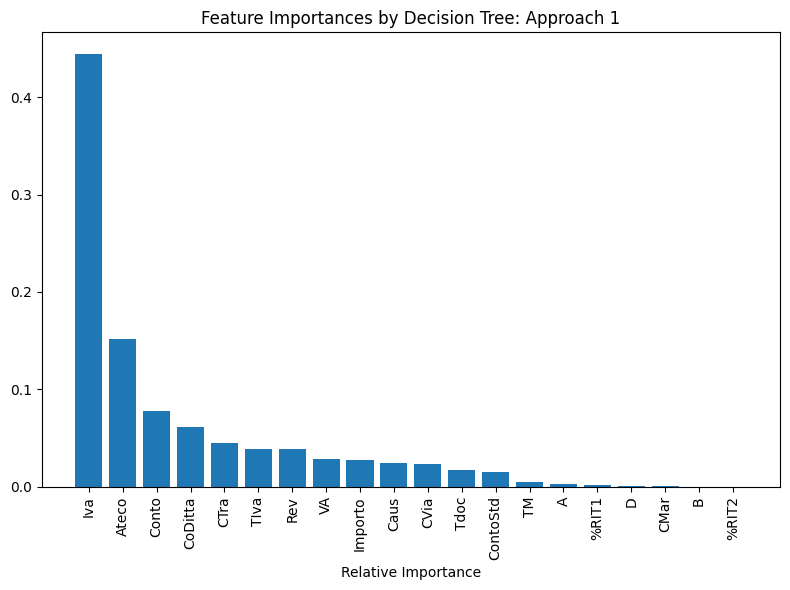

In [122]:
#storing feature importance numbers for the decision tree model
dt_importances = model_dt.feature_importances_

#visualizing feature importance
indices = np.argsort(dt_importances)[::-1]
plt.figure(figsize=(8, 6))
plt.title('Feature Importances by Decision Tree: Approach 1')
plt.bar(range(X_train.shape[1]), dt_importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlabel('Relative Importance')
plt.tight_layout()
plt.show()

In [61]:
#defining RadnomForest model and fitting in train dataset
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [62]:
#predicting variables on test dataset
y_pred_rf = model_rf.predict(X_test)

In [63]:
#printing evaluation metric results for the random forest model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9787884578635582
Random Forest Report:
               precision    recall  f1-score   support

           0       0.96      0.83      0.89        29
           2       1.00      1.00      1.00         2
           3       0.98      0.99      0.98      1401
           4       0.00      0.00      0.00         1
           6       0.90      0.86      0.88       646
           7       1.00      0.81      0.90        16
           8       0.96      0.96      0.96      1240
           9       0.00      0.00      0.00         2
          10       0.97      0.97      0.97        33
          11       0.94      0.96      0.95        80
          12       0.98      0.96      0.97       113
          13       0.98      0.98      0.98       532
          14       1.00      0.94      0.97        34
          15       0.96      0.97      0.96      1224
          16       1.00      1.00      1.00         1
          17       0.98      0.97      0.98      2265
          18   

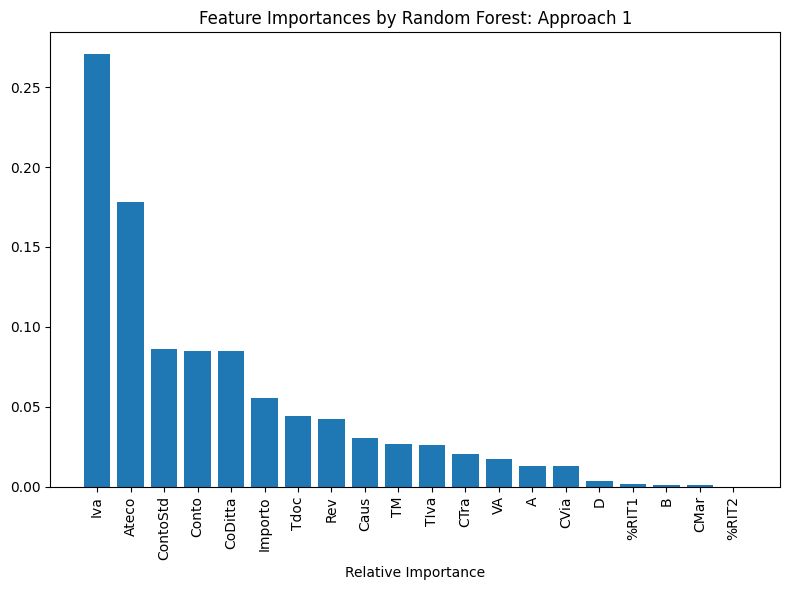

In [64]:
#storing feature importance numbers for the random foerst model
rf_importances = model_rf.feature_importances_

#visualizing feature importance
indices = np.argsort(rf_importances)[::-1]
plt.figure(figsize=(8, 6))
plt.title('Feature Importances by Random Forest: Approach 1')
plt.bar(range(X_train.shape[1]), rf_importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlabel('Relative Importance')
plt.tight_layout()
plt.show()

#### Pre-processing for the second approach

In [65]:
#taking copy from the df_copy
df_2 = df_copy.copy()

In [66]:
#checking for the null values
df_2.isna().sum()

A                     0
Ateco                 0
B                    54
DataDoc               0
D                     1
Tdoc                  0
VA                    0
DescrizioneRiga     905
Importo               0
Iva                   0
Conto                 0
ContoStd              0
IvaM                471
TM                    0
Art1                 48
Valore1              75
%RIT1                 0
%RIT2                 0
CoDitta               0
CMar                403
CTra                 84
Rev                1657
CVia                  0
X                  4465
TIva                  0
Caus                  0
dtype: int64

In [67]:
#showing unique values in X column
df_2['X'].unique()

array(['N', 'S', 'B', nan], dtype=object)

In [68]:
#assigning to 'most_frequent_category_X' mode of the X column
most_frequent_category_X = df_2['X'].mode()[0]
most_frequent_category_X

'N'

In [69]:
#filling null values in X with the 'most_frequent_category_X'
df_2['X'].fillna(most_frequent_category_X, inplace=True)

In [70]:
#showing unique values in Rev column
df_2['Rev'].unique()

array([nan, 'N', 'S'], dtype=object)

In [71]:
#assigning to 'most_frequent_category_rev' mode of the Rev column
most_frequent_category_rev = df_2['Rev'].mode()[0]
most_frequent_category_rev

'N'

In [72]:
#filling null values in Rev with the 'most_frequent_category_rev'
df_2['Rev'].fillna(most_frequent_category_rev, inplace=True)

In [73]:
#showing unique values in Cmar column
df_2['CMar'].unique()

array(['N', 1, 2, 5, nan], dtype=object)

In [74]:
#assigning to 'most_frequent_category_cmar' mode of the Rev column
most_frequent_category_cmar = df_2['CMar'].mode()[0]
most_frequent_category_cmar

'N'

In [75]:
#filling null values in Cmar with the 'most_frequent_category_cmar'
df_2['CMar'].fillna(most_frequent_category_cmar, inplace=True)

In [76]:
#showing unique values in B column
df_2['B'].unique()

array(['N', 'S', nan, 'C', 'X', 0], dtype=object)

In [77]:
#assigning to 'most_frequent_category_b' mode of the B column
most_frequent_category_b = df_2['B'].mode()[0]
most_frequent_category_b

'N'

In [78]:
#filling null values in B with the 'most_frequent_category_b'
df_2['B'].fillna(most_frequent_category_b, inplace=True)

In [79]:
#showing unique values in CTra column
df_2['CTra'].unique()

array(['S', 'N', nan], dtype=object)

In [80]:
#assigning to 'most_frequent_category_ctra' mode of the Ctra column
most_frequent_category_ctra = df_2['CTra'].mode()[0]
most_frequent_category_ctra

'S'

In [81]:
#filling null values in CTra with the 'most_frequent_category_ctra'
df_2['CTra'].fillna(most_frequent_category_ctra, inplace=True)

In [82]:
#checking for the null values count again
df_2.isnull().sum()

A                    0
Ateco                0
B                    0
DataDoc              0
D                    1
Tdoc                 0
VA                   0
DescrizioneRiga    905
Importo              0
Iva                  0
Conto                0
ContoStd             0
IvaM               471
TM                   0
Art1                48
Valore1             75
%RIT1                0
%RIT2                0
CoDitta              0
CMar                 0
CTra                 0
Rev                  0
CVia                 0
X                    0
TIva                 0
Caus                 0
dtype: int64

In [83]:
#showing unique values of DescrizioneRiga
df_2['DescrizioneRiga'].unique()

array(['MISSIONE INVALSI 5 MATEMATICA', 'VIAGGIO VACANZE 5',
       'FINALMENTE IN SECONDARIA! 5', ...,
       'ADDEBITO CANONE DI LOCAZIONE // ADDEBITO CANONE DI LOCAZIONE DEL MESE DI OTTOBRE 2022 PER LOCALI SIT',
       'ADDEBITO CANONE DI LOCAZIONE // ADDEBITO CANONE DI LOCAZIONE DEL MESE DI  SETTEMBRE 2022 PER LOCALI',
       'XXXXXXX'], dtype=object)

In [84]:
#showing unique values of IvaM
df_2['IvaM'].unique()

array([374., 315., 302.,  22., 314., 323., 354., 307., 326., 346., 310.,
       300., 324., 341., 375., 381.,  nan, 327., 312., 306., 325., 347.,
       308., 339., 309., 301., 318., 377., 372., 336.,  10.,   2., 622.,
       376.,  35., 371., 321., 369., 304., 317., 340., 322., 350., 345.,
        23., 316., 222., 399., 370., 311., 379., 110., 329., 303., 722.,
       367., 358., 334., 355., 331., 356.])

In [85]:
#showing unique values of Art1
df_2['Art1'].unique()

array(['EAN', 'AswArtFor', 'ISBN', 'NsCodice', 'Codice Art. fornitore',
       'INTERNO', 'Cod.Ced.Prest.', 'ASIN', 'Descrizione Merce',
       'CODICEARTICOLO', 'SPESA', 'CODART', 'CODICE ART.FORNITORE',
       'SPESE REV', '#Voce', 'SA', 'WKI', 'B1', 'Codice Interno',
       'COD. ART.', 'RE', 'VMA', 'CodFornitore', 'POD', 'ODOO',
       'PROPRIETARIO', 'SKU', 'CODICE', 9, 'CODICE_INTERNO', 'ENI',
       'Codice fornitore', 'CARTADELDOCENTE', 'Cod_Art', 'INT',
       'Articolo', 'FORN', 'UDP', 'COD', 'PERSONALE',
       'Codice Art. Fornitore', 'Interno', 'Anticipazione', 'Codice',
       'Codice articolo', 'BOLLO', 'inc med. STANDARD', '3B', 'ART',
       'VAR', 'MDL', '.', 'ART.', 'MDLGEST', 'A', 'AswArtCli', 'CodArt',
       'AICFARMACO', 'CODICE INTERNO', 'Cod.Interno', 'cod.Art.:', 'AN',
       'Cod', 'Cod.For.', 'Codice Art.', 'ARTICOLO', 'Codifica Interna',
       'Cod.', 'Servizio', 'Codice Articolo', 'INTERNALCODE',
       'Codice art. fornitore', 'GDS', 'Cod.Art.', 'Codice 

In [86]:
#showing unique values of Valore1
df_2['Valore1'].unique()

array([9788873343202, 9788842617013, 9788847238299, ..., 905620026062,
       864445, 907923674], dtype=object)

In [87]:
#we are dropping this columns because they are have a lot of categories
df_2 = df_2.drop(columns = ['DataDoc', 'DescrizioneRiga', 'Art1', 'Valore1'])

In [88]:
#dropping null value in D column (there's only one)
df_2 = df_2.dropna(subset=['D'])

In [89]:
#dropping null values in IvaM, we cannot replace them with the mode, 
#it would be not accurate
df_2 = df_2.dropna(subset=['IvaM'])

In [90]:
#checkin for the null values again
df_2.isnull().sum()

A           0
Ateco       0
B           0
D           0
Tdoc        0
VA          0
Importo     0
Iva         0
Conto       0
ContoStd    0
IvaM        0
TM          0
%RIT1       0
%RIT2       0
CoDitta     0
CMar        0
CTra        0
Rev         0
CVia        0
X           0
TIva        0
Caus        0
dtype: int64

In [91]:
#changing data type of IvaM to int
df_2['IvaM'] = df_2['IvaM'].astype('int32')

In [92]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133965 entries, 0 to 134436
Data columns (total 22 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   A         133965 non-null  object 
 1   Ateco     133965 non-null  int64  
 2   B         133965 non-null  object 
 3   D         133965 non-null  object 
 4   Tdoc      133965 non-null  object 
 5   VA        133965 non-null  object 
 6   Importo   133965 non-null  float64
 7   Iva       133965 non-null  object 
 8   Conto     133965 non-null  int64  
 9   ContoStd  133965 non-null  int64  
 10  IvaM      133965 non-null  int32  
 11  TM        133965 non-null  int64  
 12  %RIT1     133965 non-null  float64
 13  %RIT2     133965 non-null  float64
 14  CoDitta   133965 non-null  int64  
 15  CMar      133965 non-null  object 
 16  CTra      133965 non-null  object 
 17  Rev       133965 non-null  object 
 18  CVia      133965 non-null  object 
 19  X         133965 non-null  object 
 20  TIva     

In [93]:
#dictionary of encoders
encoders = {}

#storing encoders and encoding the dataset
for column in df_2.columns:
    if column != 'Importo':
        df_2[column] = df_2[column].astype(str)
        le = LabelEncoder()
        df_2[column] = le.fit_transform(df_2[column])
        encoders[column] = le

In [94]:
df_2

,A,Ateco,B,D,Tdoc,VA,Importo,Iva,Conto,ContoStd,...,%RIT1,%RIT2,CoDitta,CMar,CTra,Rev,CVia,X,TIva,Caus
0,6,207,2,1,3,0,3.22,3,341,170,...,0,0,539,3,1,0,0,1,2,2
1,6,207,2,1,3,0,6.20,3,341,170,...,0,0,539,3,1,0,0,1,2,2
2,6,207,2,1,3,0,21.06,3,341,170,...,0,0,539,3,1,0,0,1,2,2
3,6,207,2,1,3,0,9.50,3,341,170,...,0,0,539,3,1,0,0,1,2,2
4,6,207,2,1,3,0,11.38,3,341,170,...,0,0,539,3,1,0,0,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134432,6,253,2,1,0,0,-10.00,0,20,17,...,0,0,586,3,0,0,0,0,1,1
134433,6,253,2,1,0,0,120.00,0,20,17,...,0,0,586,3,0,0,0,0,1,1
134434,6,253,2,1,0,0,-150.00,0,20,17,...,0,0,586,3,0,0,0,0,1,1
134435,6,253,2,1,0,0,52.00,0,20,17,...,0,0,586,3,0,0,0,0,1,1


In [95]:
#correlation matrix of obtained dataframe for the second approach
corr_matrix_df2 = df_2.corr()

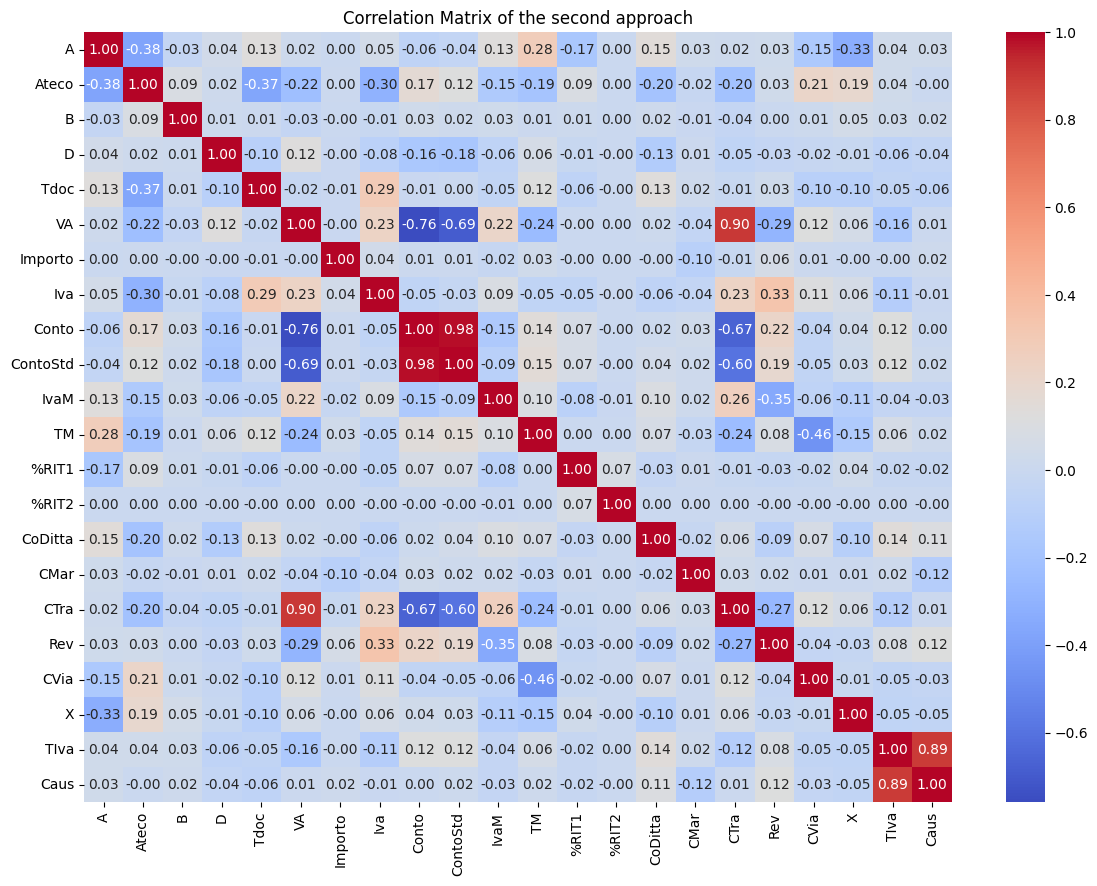

In [96]:
#plotting the correlation matrix 
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix_df2, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of the second approach')
plt.show()

#### ML Approach 2

In [97]:
#dividing features and target vaiable (IvaM)
X = df_2.drop(columns=['IvaM'])
y = df_2['IvaM']

In [98]:
#splitting train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
#defining a multinomial logistic regression model and fitting in train dataset
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
log_reg.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

In [100]:
#predicting variables on test dataset
log_reg_pred = log_reg.predict(X_test)

In [101]:
#printing evaluation metric results for the logistic regression model
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_reg_pred))
print("Logistic Regression Report:\n", classification_report(y_test, log_reg_pred))

Logistic Regression Accuracy: 0.3284066733848393
Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           2       0.00      0.00      0.00         3
           3       0.32      0.25      0.28      1441
           4       0.00      0.00      0.00         1
           6       0.73      0.06      0.12       783
           7       0.00      0.00      0.00        14
           8       0.00      0.00      0.00      1298
          10       0.00      0.00      0.00        27
          11       0.00      0.00      0.00        82
          12       0.00      0.00      0.00       111
          13       0.00      0.00      0.00       540
          14       0.00      0.00      0.00        44
          15       0.00      0.00      0.00      1217
          17       0.36      0.31      0.33      2322
          18       0.00      0.00      0.00       128
          19       0.13      0.13      0.13      3352
   

In [102]:
#defining simple SupportVectorMachine classifier model and fitting in train dataset
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [103]:
#predicting variables on test dataset
svm_pred = svm.predict(X_test)

In [104]:
#printing evaluation metric results for the svm model
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print("SVM Report:\n", classification_report(y_test, svm_pred))

SVM Accuracy: 0.403500914417945
SVM Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           2       0.00      0.00      0.00         3
           3       0.42      0.22      0.29      1441
           4       0.00      0.00      0.00         1
           6       0.70      0.07      0.12       783
           7       0.00      0.00      0.00        14
           8       0.59      0.84      0.69      1298
          10       0.00      0.00      0.00        27
          11       0.00      0.00      0.00        82
          12       0.00      0.00      0.00       111
          13       0.00      0.00      0.00       540
          14       0.00      0.00      0.00        44
          15       0.47      0.12      0.20      1217
          17       0.38      0.39      0.39      2322
          18       0.00      0.00      0.00       128
          19       0.33      0.06      0.09      3352
          21       0.78      0.23   

In [105]:
#defining KNeighborsClassifier and fitting in train dataset
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [106]:
#predicting variables on test dataset
knn_pred = knn.predict(X_test)

In [107]:
#printing evaluation metric results for the knn model
print("KNN Accuracy:", accuracy_score(y_test, knn_pred))
print("KNN Report:\n", classification_report(y_test, knn_pred))

KNN Accuracy: 0.9074385100585974
KNN Report:
               precision    recall  f1-score   support

           0       0.25      0.21      0.23        29
           2       0.00      0.00      0.00         3
           3       0.78      0.87      0.82      1441
           4       0.00      0.00      0.00         1
           6       0.77      0.69      0.73       783
           7       0.56      0.36      0.43        14
           8       0.94      0.93      0.93      1298
           9       0.00      0.00      0.00         0
          10       0.65      0.74      0.69        27
          11       0.69      0.55      0.61        82
          12       0.72      0.65      0.68       111
          13       0.89      0.90      0.89       540
          14       0.85      0.52      0.65        44
          15       0.82      0.86      0.84      1217
          17       0.94      0.96      0.95      2322
          18       0.93      0.89      0.91       128
          19       0.92      0.91  

In [123]:
#defining DecisionTreeClassifier model and fitting in train dataset
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [124]:
#predicting variables on test dataset
dt_pred = dt.predict(X_test)

In [125]:
#printing evaluation metric results for the model
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print("Decision Tree Report:\n", classification_report(y_test, dt_pred))

Decision Tree Accuracy: 0.9751194343588764
Decision Tree Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           2       0.67      1.00      0.80         2
           3       0.98      0.98      0.98      1401
           4       0.00      0.00      0.00         1
           6       0.86      0.83      0.84       646
           7       0.88      0.88      0.88        16
           8       0.95      0.97      0.96      1240
           9       0.00      0.00      0.00         2
          10       0.94      0.97      0.96        33
          11       0.95      0.97      0.96        80
          12       0.95      0.96      0.95       113
          13       0.97      0.97      0.97       532
          14       0.97      0.94      0.96        34
          15       0.96      0.96      0.96      1224
          16       1.00      1.00      1.00         1
          17       0.97      0.98      0.97      2265
          18   

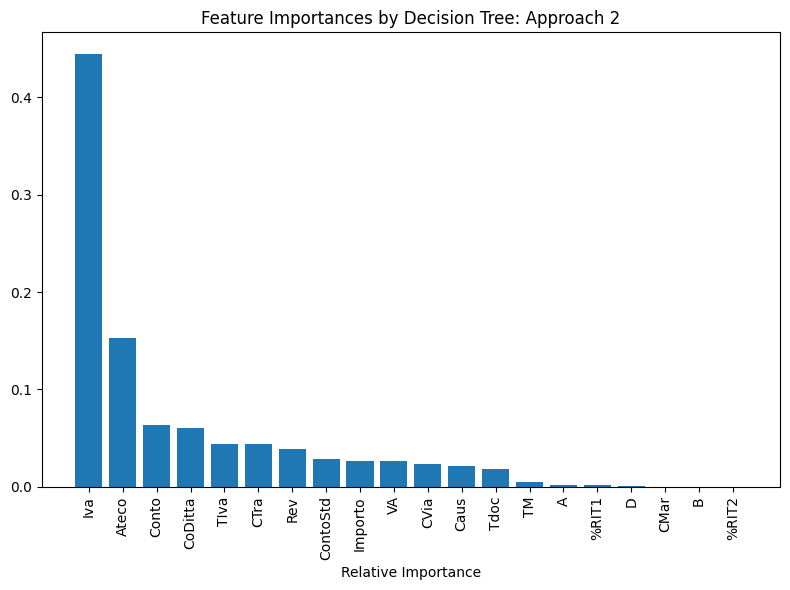

In [126]:
#storing feature importance numbers for the decision tree model
dt_importances = dt.feature_importances_

#visualizing feature importance
indices = np.argsort(dt_importances)[::-1]
plt.figure(figsize=(8, 6))
plt.title('Feature Importances by Decision Tree: Approach 2')
plt.bar(range(X_train.shape[1]), dt_importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlabel('Relative Importance')
plt.tight_layout()
plt.show()

In [112]:
#defining RadnomForest model and fitting in train dataset
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [113]:
#predicting variables on test dataset
rf_pred = rf.predict(X_test)

In [114]:
#printing evaluation metric results for the random forest model
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Random Forest Report:\n", classification_report(y_test, rf_pred))

Random Forest Accuracy: 0.9777927070503489
Random Forest Report:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93        29
           2       1.00      1.00      1.00         3
           3       0.98      0.99      0.98      1441
           4       0.00      0.00      0.00         1
           6       0.92      0.87      0.89       783
           7       0.91      0.71      0.80        14
           8       0.96      0.96      0.96      1298
          10       0.96      0.96      0.96        27
          11       0.99      0.96      0.98        82
          12       0.98      0.97      0.98       111
          13       0.97      0.97      0.97       540
          14       1.00      0.93      0.96        44
          15       0.95      0.98      0.96      1217
          17       0.97      0.97      0.97      2322
          18       0.98      0.96      0.97       128
          19       0.99      0.99      0.99      3352
          21   

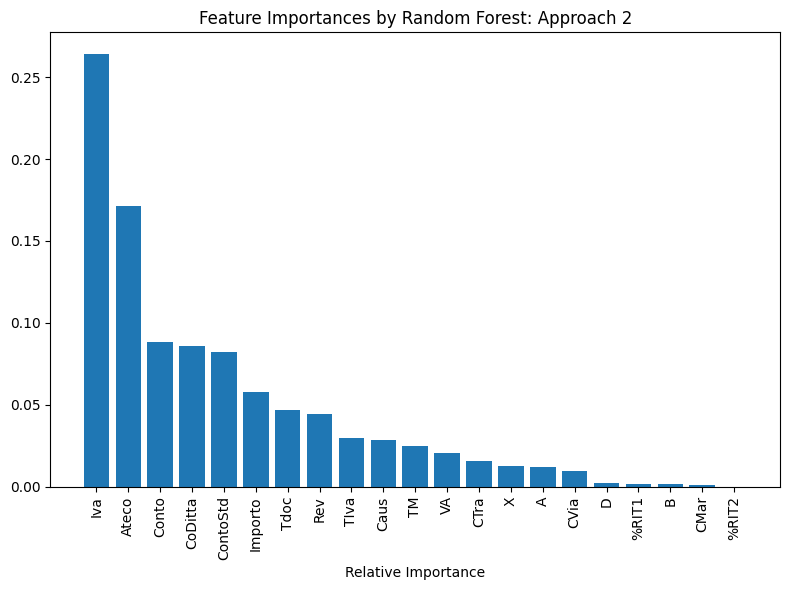

In [115]:
#storing feature importance numbers for the random forest model
rf_importances = rf.feature_importances_

#visualizing feature importance
indices = np.argsort(rf_importances)[::-1]
plt.figure(figsize=(8, 6))
plt.title('Feature Importances by Random Forest: Approach 2')
plt.bar(range(X_train.shape[1]), rf_importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlabel('Relative Importance')
plt.tight_layout()
plt.show()